In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import re
import matplotlib.pylab as pl
import matplotlib.ticker as tick

In [35]:
df=pd.read_csv('csv/ks_2018.csv',index_col='ID')
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [36]:
shape_map = {"failed":"x", "successful":"v", "canceled":"x", "undefined":"x", "live":"x", "suspended":"x"}
color_map = {"failed":"red", "successful":"blue", "canceled":"red", "undefined":"red", "live":"red", "suspended":"red"}

df['shapes']= df.state.map(shape_map)
df['color']= df.state.map(color_map)

converted_deadline = pd.to_datetime(df.deadline)
converted_launched_date=pd.to_datetime(df.launched)
df['days_between']=converted_deadline-converted_launched_date
df['days_between']=df['days_between'].apply(lambda x : x.days)

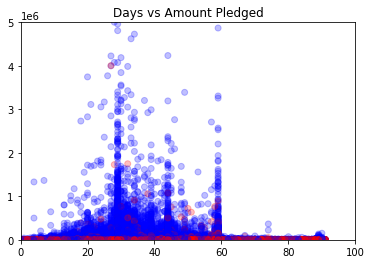

In [37]:
shape_vector=list(df.state.map(shape_map))
color_vector=list(df.state.map(color_map))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,100)
plt.ylim(0,5000000)
plt.title("Days vs Amount Pledged")

c = ax.scatter(x=df.days_between,y=df.pledged , c=color_vector,alpha=0.25)
plt.savefig('scatter_daysvspledged.png')

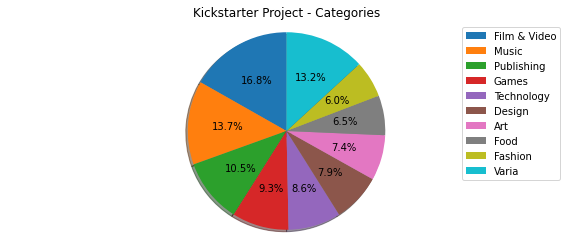

In [23]:
number_of_records=df.shape[0]
vc=df.main_category.value_counts()
vc_in_percentages=vc/number_of_records

#the sections that are smaller than 
smaller_section= vc_in_percentages[vc_in_percentages<0.03]
vc_in_percentages= vc_in_percentages[vc_in_percentages>=0.03]

vc_in_percentages.items()

keywords,percentages=zip(*vc_in_percentages.items())
keywords=list(keywords)
percentages=list(percentages)
keywords.append('Varia')
percentages.append(smaller_section.sum())
        

fig1, ax1 = plt.subplots()
ax1.pie(percentages,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Kickstarter Project - Categories')
plt.legend(keywords)
fig1.set_figwidth(10)
plt.savefig('pie_categories.png')
plt.show()

In [24]:
df = df[['name', 'category', 'main_category', 'deadline', 
         'launched', 'state', 'backers', 'country', 'usd pledged', 'usd_goal_real']]
# keep only columns needed for analysis

In [25]:
colors = [ '#BBB193','#88CED7', '#C1D8BF', '#E9E2AB', '#F77C11', 
          '#1C6B89', '#3A405A', '#AEC5EB', '#F9DEC9','#E9AFA3', 
          '#685044', '#9D652A', '#E8EDE4', '#3BAF8D','#28536B', 
          '#C2948A', '#7EA8BE', '#F6F0ED']

In [26]:
# convert y-tick numbers into Ks instead of 1000s
def y_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '{0:.0f}k'.format(val)
    else:
        return tick_val

In [27]:
# convert x-tick numbers into Ks instead of 1000s
def x_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '{0:.0f}k'.format(val)
    else:
        return tick_val

In [28]:
# show percentage > 10%
def my_autopct_ten(pct):
    if pct > 10:
        return ('%.2f' % pct + '%')
    else:
        return ''

In [29]:
# dont show percentage
# show percentage > 100%
def my_autopct_noshow(pct):
    if pct > 100:
        return ('%.2f' % pct + '%')
    else:
        return ''

In [30]:
df.groupby('main_category').size().sort_values()

main_category
Dance            3768
Journalism       4755
Crafts           8809
Photography     10779
Comics          10819
Theater         10913
Fashion         22816
Food            24602
Art             28153
Design          30070
Technology      32569
Games           35231
Publishing      39874
Music           51918
Film & Video    63585
dtype: int64

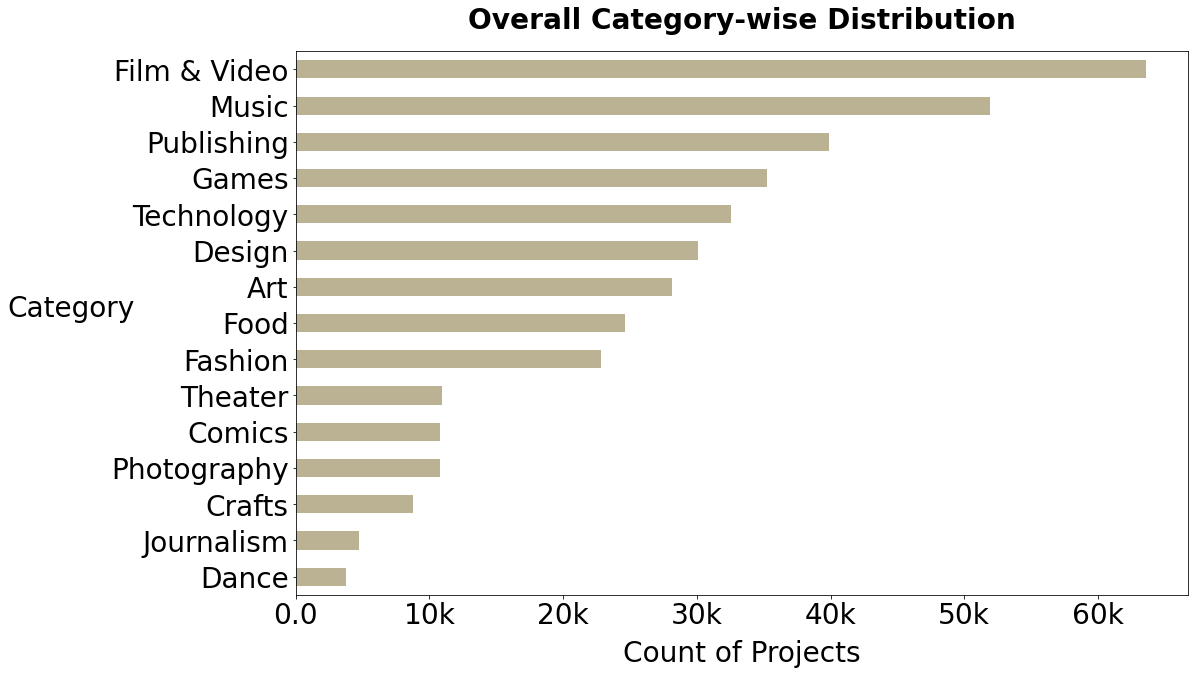

In [31]:
with sns.color_palette(colors):
    plt.figure(figsize=(16, 10))
    df.groupby('main_category').size().sort_values(ascending = True).plot.barh()
    plt.title('Overall Category-wise Distribution', y=1.03, fontsize = 28, fontweight='bold')
    plt.xticks(rotation=0, fontsize=28)
    plt.yticks(fontsize=28)
    plt.xlabel('Count of Projects', labelpad=10, fontsize=28)
    plt.ylabel('Category',rotation=0, labelpad=40, fontsize=28)
    plt.savefig('bar_overallcategorywisedistribution.png')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt));

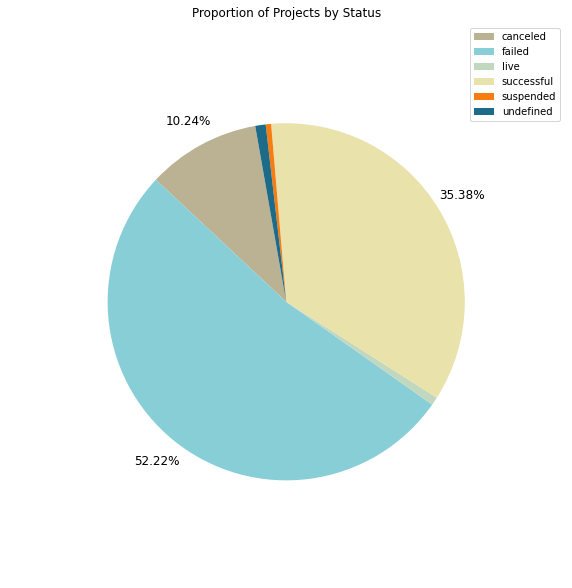

In [40]:
with sns.color_palette(colors):
    ax=df.groupby('state').size().plot(kind='pie', labels=None,
            legend=True, pctdistance=1.15, figsize=(10,12), autopct=my_autopct_ten, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='Proportion of Projects by Status')    
    ax.set_ylabel('');
    plt.savefig("pie_proportionofprojectsbystatus.png")